In [1]:
#Import the libraries to use
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
#Set initial conditions
y_increment = .25
x_increment = y_increment*2
data_points = 2000

In [56]:
#This function is an adder to mix up the X and Y from it's origin
def get_random_adder():
    positive_negative_choice = [-1,1]
    random_positive_negative = random.random()*random.choice(positive_negative_choice)
    return(float(random_positive_negative))

In [25]:
#This function is used to spread out the Y value and add in outliers
def get_random_multi():
    population = [1,1.5,2,2.5,3,4,5,10]
    weight = [32.5,20,15,10,9,7.5,5,.5]
    multi = random.choices(population,weight,k=1)
    return(multi[0])

In [31]:
#This function is used to remove a certain percentage of the data, or to thin it
def get_removal_chance(removal_percent=.2):
    rem = removal_percent
    binary_lst = [0,1]
    removal_weight = [rem,1-rem]
    removal = random.choices(binary_lst,removal_weight)[0]
    return(removal)

In [68]:
#Creates the dataframe
x=[]
y=[]
x_shift=[]
y_shift=[]
remove=[]
for point in range(data_points):
    x.append((point+1)*x_increment)
    y.append((point+1)*y_increment)
    x_shift.append(x[point]+get_random_adder())
    y_shift.append(y[point]+(70*get_random_adder()*get_random_multi()))
    remove.append(get_removal_chance(.8))
    
dict = {'variable':x,'solution':y,'adjusted_variable':x_shift,
        'adjusted_solution':y_shift,'removal_odds':remove} 
simple_linear=pd.DataFrame(dict)

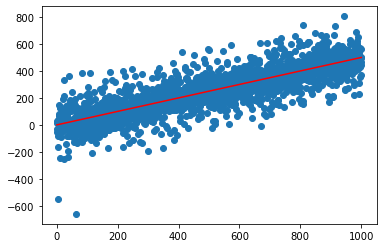

In [69]:
plt.scatter(simple_linear['variable'],simple_linear['adjusted_solution'])
plt.plot(simple_linear['variable'],simple_linear['solution'],color='red')

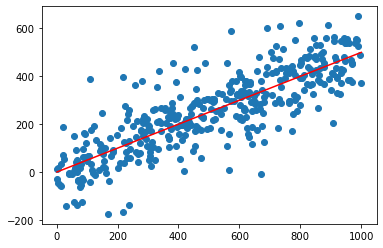

In [92]:
simple_linear_light = simple_linear.loc[simple_linear['removal_odds']==1]
plt.scatter(simple_linear_light['variable'],simple_linear_light['adjusted_solution'])
plt.plot(simple_linear_light['variable'],simple_linear_light['solution'],color='red')

In [93]:
simple_linear_light.head()

,variable,solution,adjusted_variable,adjusted_solution,removal_odds
1,1.0,0.50,1.509421,13.423142,1
2,1.5,0.75,1.633492,-28.429589,1
5,3.0,1.50,2.954605,-47.179158,1
11,6.0,3.00,5.847970,16.094895,1
20,10.5,5.25,10.887762,-51.850301,1


In [94]:
simple_linear_light['answer'] = simple_linear_light['solution'].apply(lambda x: 1 if x >= 400 else 0)

<ipython-input-94-a759d687bd7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_linear_light['answer'] = simple_linear_light['solution'].apply(lambda x: 1 if x >= 400 else 0)


In [96]:
simple_linear_light.sample(10)

,variable,solution,adjusted_variable,adjusted_solution,removal_odds,answer
1866,933.5,466.75,934.262396,414.818606,1,1
844,422.5,211.25,422.753911,156.463172,1,0
805,403.0,201.50,402.168682,161.053478,1,0
1440,720.5,360.25,721.042564,417.007247,1,0
80,40.5,20.25,40.960014,-4.131232,1,0
1186,593.5,296.75,593.075207,321.152845,1,0
160,80.5,40.25,80.960114,34.917487,1,0
548,274.5,137.25,275.489189,120.718387,1,0
1632,816.5,408.25,816.805661,481.376091,1,1
544,272.5,136.25,272.937930,79.993684,1,0


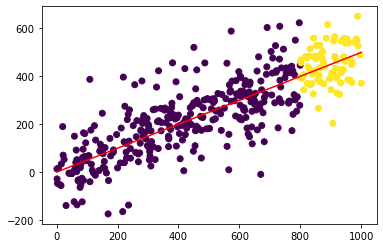

In [97]:
plt.scatter(simple_linear_light['variable'],simple_linear_light['adjusted_solution'],c=simple_linear_light['answer'])
plt.plot(simple_linear_light['variable'],simple_linear_light['solution'],color='red')